In [2]:
!wget --no-check-certificate https://data.cityofchicago.org/api/views/d62x-nvdr/rows.csv?accessType=DOWNLOAD

--2021-05-21 14:07:56--  https://data.cityofchicago.org/api/views/d62x-nvdr/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [       <=>          ]  60.88M  3.04MB/s    in 20s     

2021-05-21 14:08:17 (2.99 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [63835033]



In [3]:
from math import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


crimesDf= pd.read_csv('rows.csv?accessType=DOWNLOAD')
crimesDf.head(2)

ID Case Number                    Date  ... Latitude Longitude Location
0  11227287    JB147188  10/08/2017 03:00:00 AM  ...      NaN       NaN      NaN
1  11227583    JB147595  03/28/2017 02:00:00 PM  ...      NaN       NaN      NaN

[2 rows x 22 columns]

Vemos la descripcion de los datos del proyecto

In [4]:
crimesDf.describe()

ID           Beat  ...       Latitude      Longitude
count  2.687940e+05  268794.000000  ...  264932.000000  264932.000000
mean   1.098454e+07    1145.591680  ...      41.844494     -87.670217
std    5.626516e+05     699.779241  ...       0.085990       0.058677
min    2.305900e+04     111.000000  ...      41.644606     -87.928909
25%    1.090974e+07     611.000000  ...      41.769588     -87.712288
50%    1.101238e+07    1031.000000  ...      41.865299     -87.664009
75%    1.110843e+07    1722.000000  ...      41.906364     -87.627760
max    1.236896e+07    2535.000000  ...      42.022671     -87.524529

[8 rows x 10 columns]

Verificamos la falta de datos en el dataset, los valores null

In [5]:
crimesDf.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1247
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                       1
Community Area             0
FBI Code                   0
X Coordinate            3862
Y Coordinate            3862
Year                       0
Updated On                 0
Latitude                3862
Longitude               3862
Location                3862
dtype: int64

In [6]:
sum(crimesDf.duplicated())

0

Realizamos algunas graficas basica de los valores: 

District
11.0    18047
6.0     16553
8.0     16549
1.0     15416
Name: ID, dtype: int64


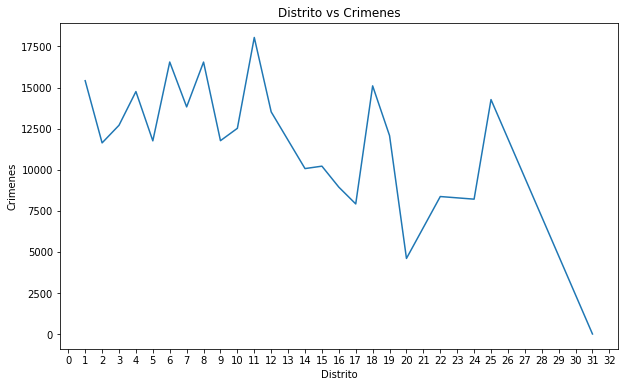

In [7]:
crimes_by_district = crimesDf.groupby('District').count()['ID'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Crimenes')
plt.xlabel('Distrito')
plt.ylabel('Crimenes')
sns.set_style('whitegrid')

District
25.0    36008263
18.0    27578853
19.0    23220598
11.0    20279494
24.0    19870016
22.0    18600057
12.0    16533329
15.0    15565891
16.0    14554040
14.0    14332010
8.0     13641227
17.0    13635901
10.0    12782637
9.0     10856828
6.0     10301099
7.0      9996273
20.0     9295788
4.0      6217535
5.0      6126055
3.0      4100054
2.0      2583023
1.0      1844146
Name: Beat, dtype: int64


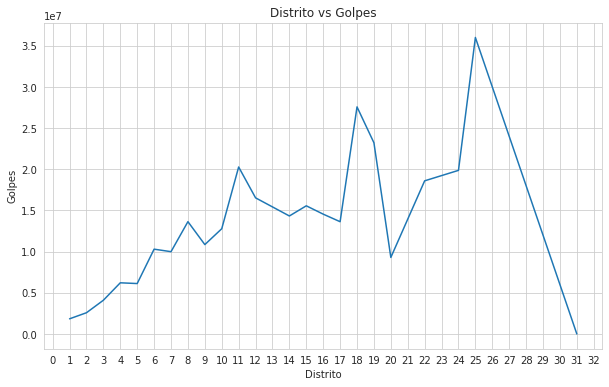

In [11]:
crimes_by_district = crimesDf.groupby('District').sum()['Beat'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Golpes')
plt.xlabel('Distrito')
plt.ylabel('Golpes')
sns.set_style('whitegrid')

District
11.0    18047
6.0     16553
8.0     16549
1.0     15416
Name: Ward, dtype: int64


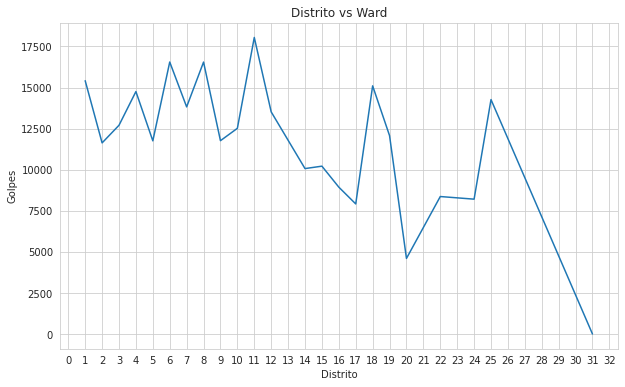

In [12]:
crimes_by_district = crimesDf.groupby('District').count()['Ward'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Ward')
plt.xlabel('Distrito')
plt.ylabel('Golpes')
sns.set_style('whitegrid')

District
8.0     1060905
6.0      975056
7.0      934041
4.0      691324
9.0      665744
3.0      619474
5.0      600207
22.0     593821
1.0      489315
Name: Community Area, dtype: int64


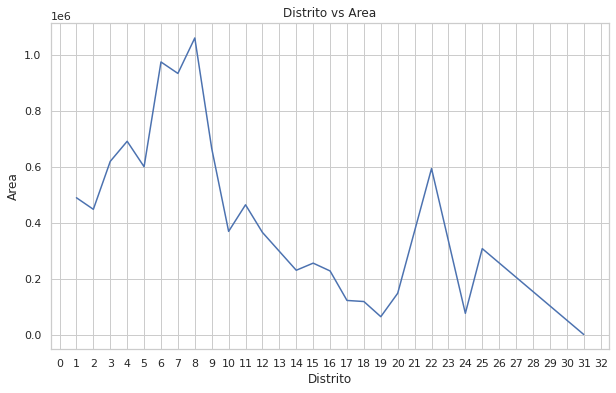

In [76]:
crimes_by_district = crimesDf.groupby('District').sum()['Community Area'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Area')
plt.xlabel('Distrito')
plt.ylabel('Area')
sns.set_style('whitegrid')

Primary Type
THEFT    64376
Name: ID, dtype: int64


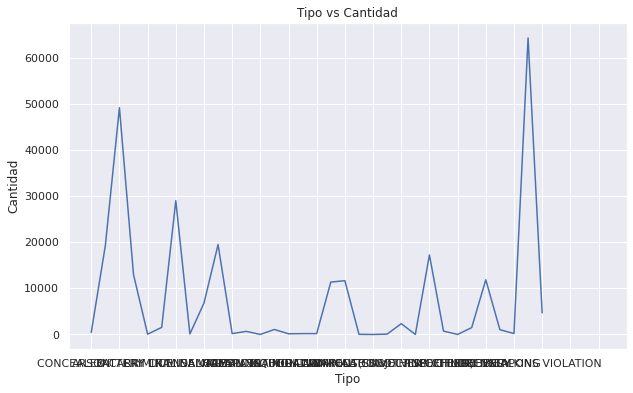

In [75]:
crimenes = crimesDf.groupby('Primary Type').count()['ID'];
print(crimenes.sort_values(ascending = False)[ : 1])
crimenes.plot(xticks = np.arange(0, 40, 2), figsize = (10,6))
plt.title('Tipo vs Cantidad')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
sns.set_style('whitegrid')

Realizamos algunas listas sobre los datos:

In [18]:
crimenes = crimesDf.sort_values(by = 'District', ascending = False)[:10]
crimenes.loc[: , ['ID', 'Primary Type','District']]

ID                Primary Type  District
233815  11204562  OFFENSE INVOLVING CHILDREN      31.0
65202   10910704          DECEPTIVE PRACTICE      31.0
263127  11076407  OFFENSE INVOLVING CHILDREN      31.0
244080  11171353                     BATTERY      25.0
134797  11134057                       THEFT      25.0
134799  11134061                   NARCOTICS      25.0
240072  11165713                       THEFT      25.0
240074  11165715                       THEFT      25.0
240075  11165716                     ROBBERY      25.0
41996   10872094                     ASSAULT      25.0

In [19]:
crimenes = crimesDf.sort_values(by = 'Ward', ascending = False)[:10]
crimenes.loc[: , ['ID', 'Primary Type','Ward']]

ID        Primary Type  Ward
135828  11135581  DECEPTIVE PRACTICE  50.0
3146    10824339               THEFT  50.0
156440  11017897     CRIMINAL DAMAGE  50.0
198319  11079218             BATTERY  50.0
84281   10940183             BATTERY  50.0
185744  11061426             ASSAULT  50.0
133893  11132805             BATTERY  50.0
258799  11191158            BURGLARY  50.0
179443  11052211             BATTERY  50.0
99242   10962442               THEFT  50.0

Realizamos graficas sobre la ubicacion de los crimenes

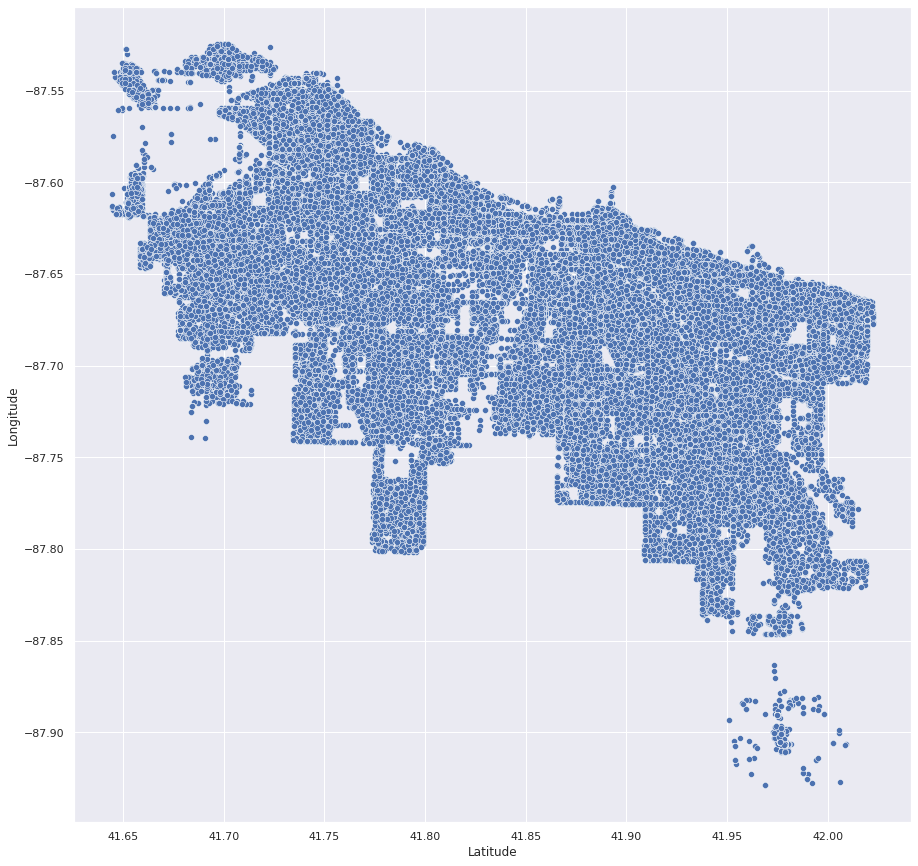

In [20]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=crimesDf, x="Latitude", y="Longitude");

Contamos la cantidad de crimenes de cada catergoria que se tiene

In [21]:
crime_count = pd.Series(crimesDf['Primary Type']).value_counts(ascending = False)
crime_count.head(20)

THEFT                               64376
BATTERY                             49235
CRIMINAL DAMAGE                     29044
DECEPTIVE PRACTICE                  19517
ASSAULT                             19306
OTHER OFFENSE                       17260
BURGLARY                            12999
ROBBERY                             11880
NARCOTICS                           11674
MOTOR VEHICLE THEFT                 11381
CRIMINAL TRESPASS                    6815
WEAPONS VIOLATION                    4686
OFFENSE INVOLVING CHILDREN           2341
CRIM SEXUAL ASSAULT                  1543
PUBLIC PEACE VIOLATION               1498
INTERFERENCE WITH PUBLIC OFFICER     1087
SEX OFFENSE                          1044
PROSTITUTION                          735
HOMICIDE                              674
ARSON                                 444
Name: Primary Type, dtype: int64

In [22]:
grouped = crimesDf.groupby("Primary Type")
sexual=grouped.get_group("CRIM SEXUAL ASSAULT")
theft=grouped.get_group("THEFT")
battery=grouped.get_group("BATTERY")
criminal=grouped.get_group("CRIMINAL DAMAGE")
deceptive=grouped.get_group("DECEPTIVE PRACTICE")
assault=grouped.get_group("ASSAULT")

In [23]:
concatenated = pd.concat([theft.assign(dataset='set1'), battery.assign(dataset='set2')])

Grafica de varios tipos de crimenes

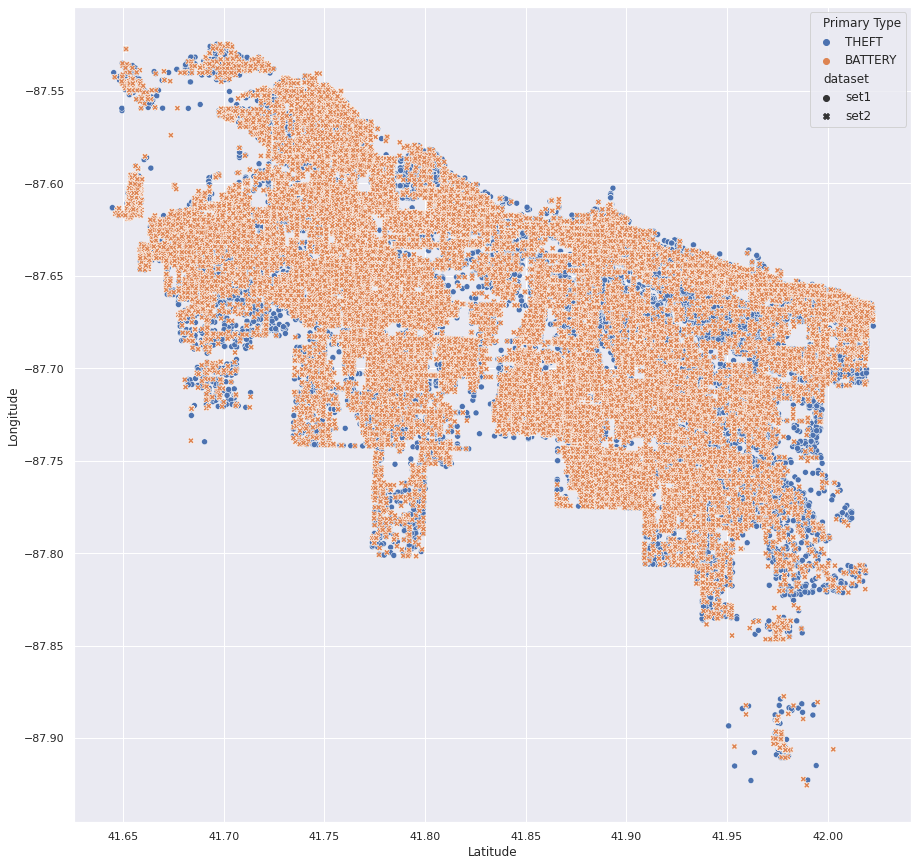

In [24]:
sns.scatterplot(x='Latitude', y='Longitude', data=concatenated,hue="Primary Type", style='dataset')
plt.show()

Grafica de crimenes de indole sexual

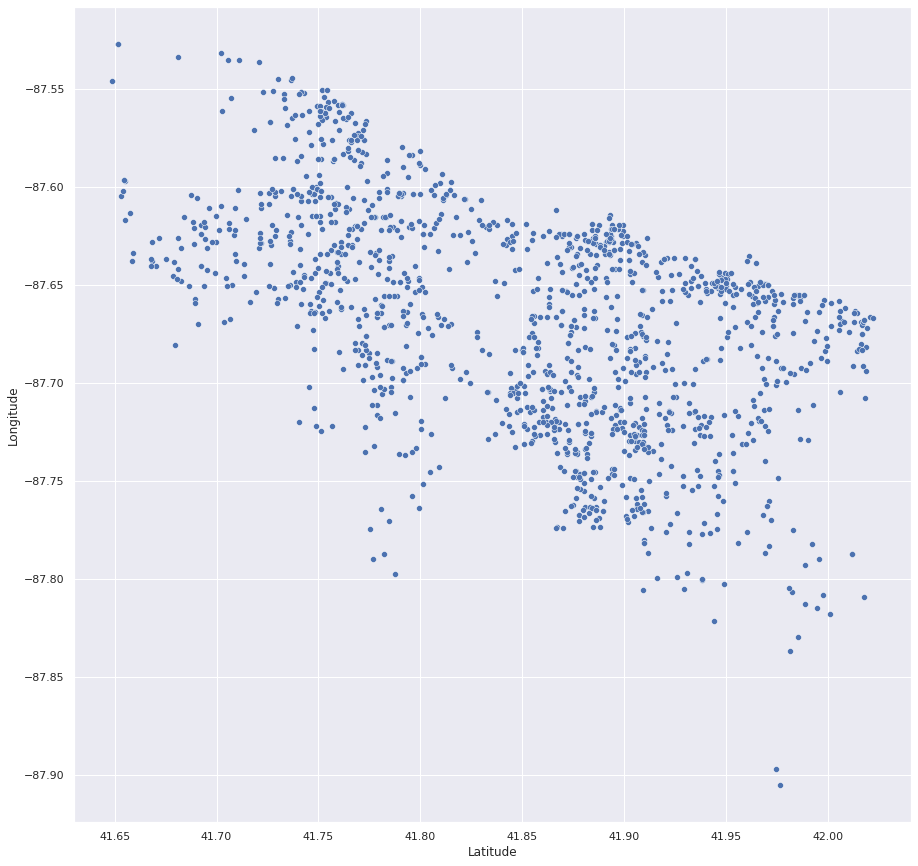

In [25]:
sns.scatterplot(data=sexual, x="Latitude", y="Longitude");

In [26]:
from sklearn.cluster import KMeans

separado=sexual.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)

Ubicamos 20 clusters segun la ubicacion de este tipo de crimenes, estas son zonas que se deben evitar o que deben de ser mejor cuidadas

In [29]:
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 41.91033457 -87.68218014]
 [ 41.7519858  -87.6490762 ]
 [ 41.90540625 -87.72338166]
 [ 41.70464226 -87.6302234 ]
 [ 41.75715025 -87.56967904]
 [ 41.86494155 -87.67109093]
 [ 41.99642035 -87.6775445 ]
 [ 41.89097539 -87.63098141]
 [ 41.97578978 -87.80652605]
 [ 41.89386699 -87.76217473]
 [ 41.78232867 -87.73386088]
 [ 41.86174275 -87.71456896]
 [ 41.95247636 -87.6534364 ]
 [ 41.95174899 -87.73592956]
 [ 41.83769911 -87.62637206]
 [ 41.67159658 -87.63309227]
 [ 41.74524494 -87.60884694]
 [ 41.78767127 -87.67443715]
 [ 41.70867507 -87.54708537]
 [ 41.79080055 -87.61173316]]


In [31]:
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
print(df)

   Primary Type            Latitude           Longitude
0       Cluster  41.910334574836064  -87.68218014086885
1       Cluster   41.75198580048611  -87.64907619608333
2       Cluster   41.90540625280953  -87.72338166465477
3       Cluster  41.704642256020406  -87.63022339812245
4       Cluster   41.75715024574074  -87.56967904296296
5       Cluster  41.864941547028984  -87.67109092966666
6       Cluster   41.99642035107407  -87.67754449807407
7       Cluster   41.89097539196795  -87.63098141130128
8       Cluster       41.9757897815  -87.80652605110714
9       Cluster  41.893866987741575  -87.76217472894382
10      Cluster   41.78232866710811       -87.733860883
11      Cluster   41.86174275208621  -87.71456895884482
12      Cluster  41.952476359349056  -87.65343640283962
13      Cluster   41.95174898876562  -87.73592956065625
14      Cluster   41.83769911168293   -87.6263720622439
15      Cluster   41.67159658068965  -87.63309226958621
16      Cluster    41.7452449387971  -87.6088469

In [32]:
con_clusters = pd.concat([sexual.assign(dataset='set1'), df.assign(dataset='set2')])

Ubicacion de los centro de concentracion

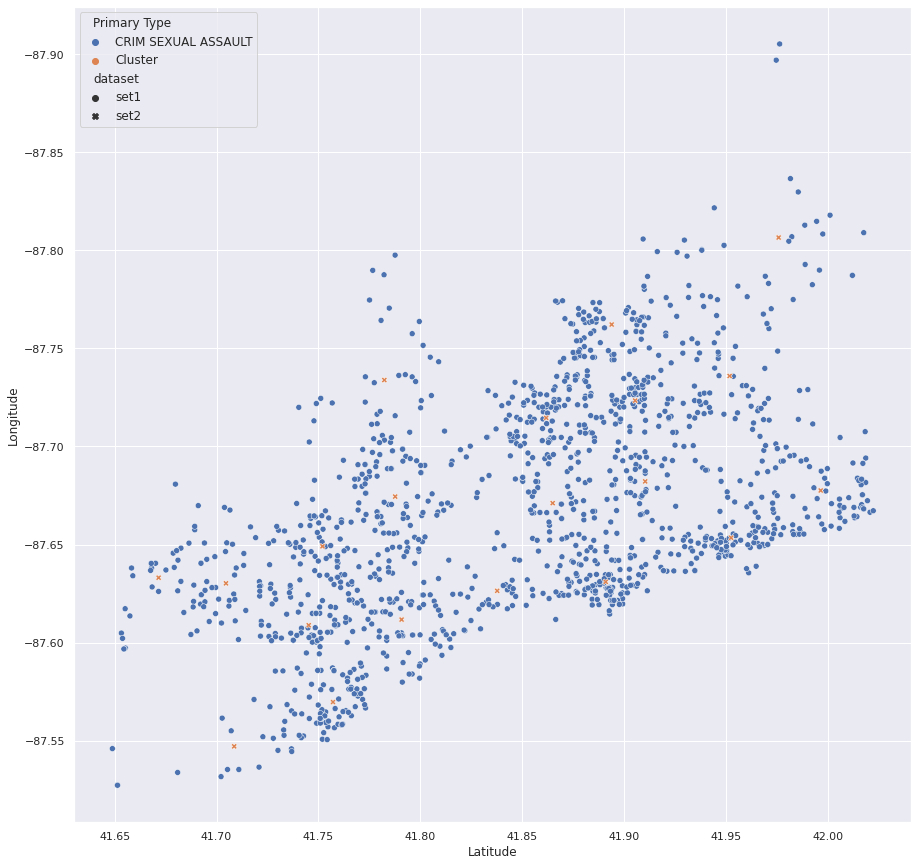

In [33]:
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

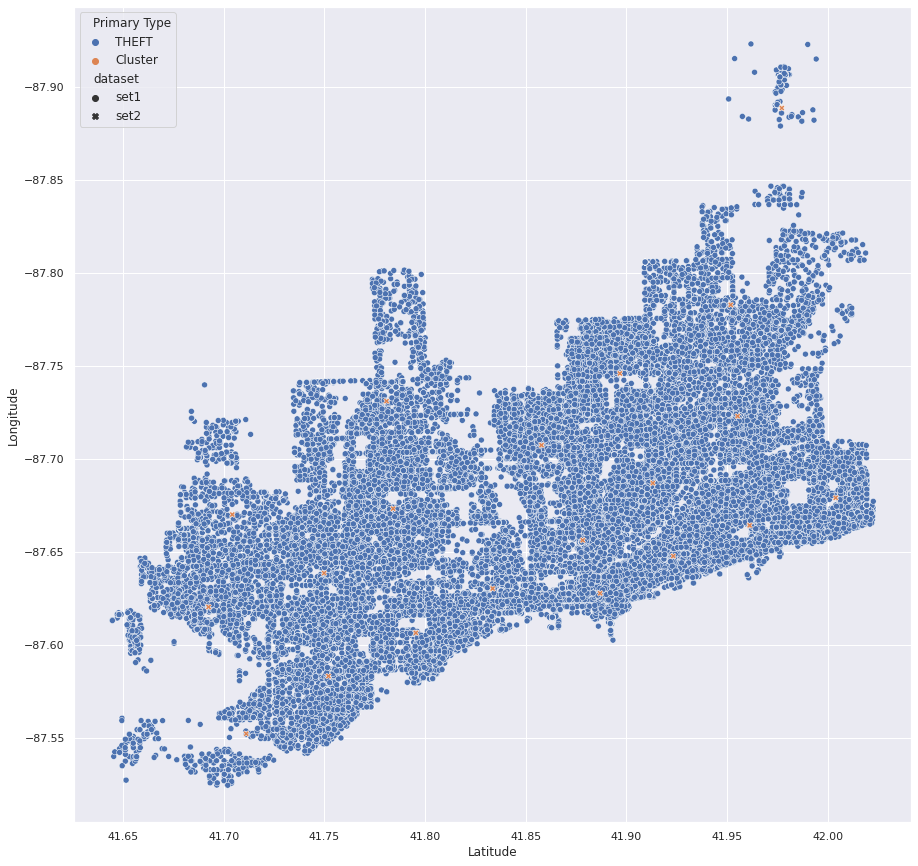

In [36]:
subconjunto=theft
separado=subconjunto.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
con_clusters = pd.concat([subconjunto.assign(dataset='set1'), df.assign(dataset='set2')])
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

In [ ]:
'''
grouped = crimesDf.groupby("Primary Type")
sexual=grouped.get_group("CRIM SEXUAL ASSAULT")
theft=grouped.get_group("THEFT")
battery=grouped.get_group("BATTERY")
criminal=grouped.get_group("CRIMINAL DAMAGE")
deceptive=grouped.get_group("DECEPTIVE PRACTICE")
assault=grouped.get_group("ASSAULT")
'''

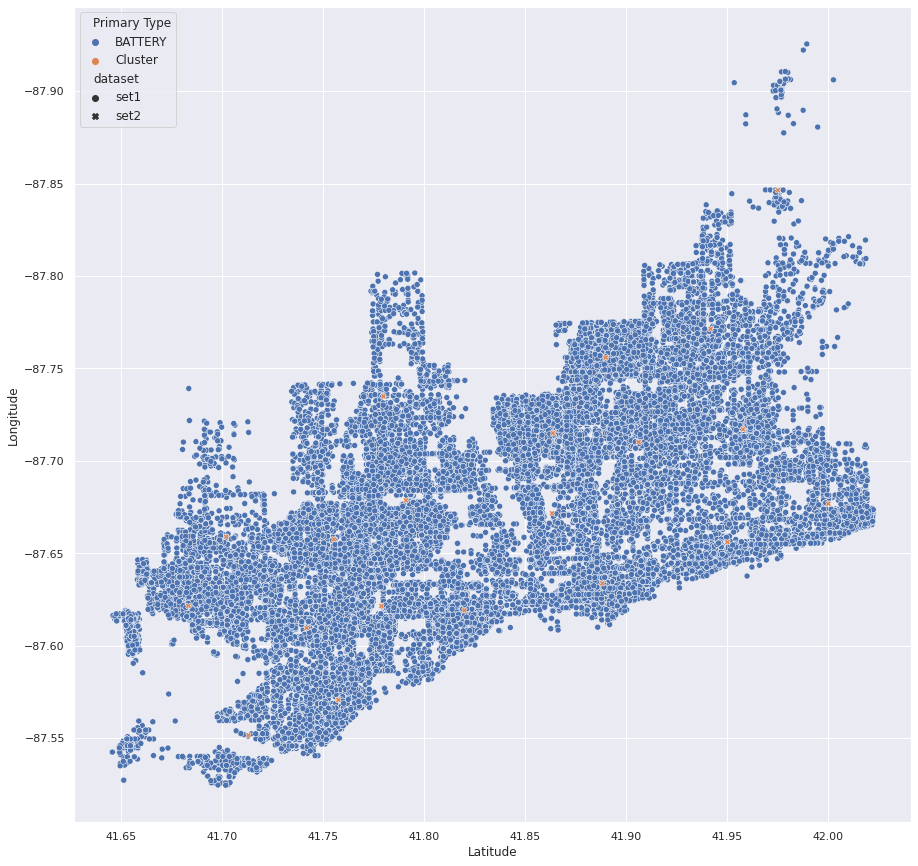

In [35]:
subconjunto=battery
separado=subconjunto.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
con_clusters = pd.concat([subconjunto.assign(dataset='set1'), df.assign(dataset='set2')])
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

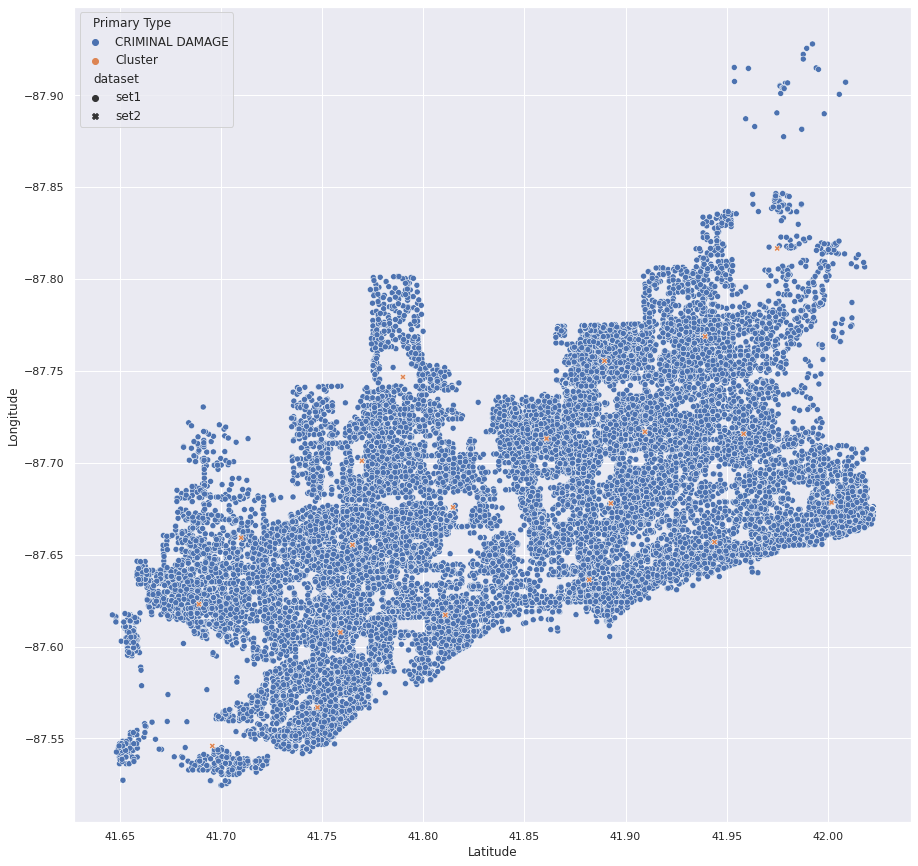

In [37]:
subconjunto=criminal
separado=subconjunto.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
con_clusters = pd.concat([subconjunto.assign(dataset='set1'), df.assign(dataset='set2')])
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

Habiendo filtrado en los tipos de crimenes, luego filtramos en ubicaicones de distritos

In [50]:
districts = theft.groupby("District")

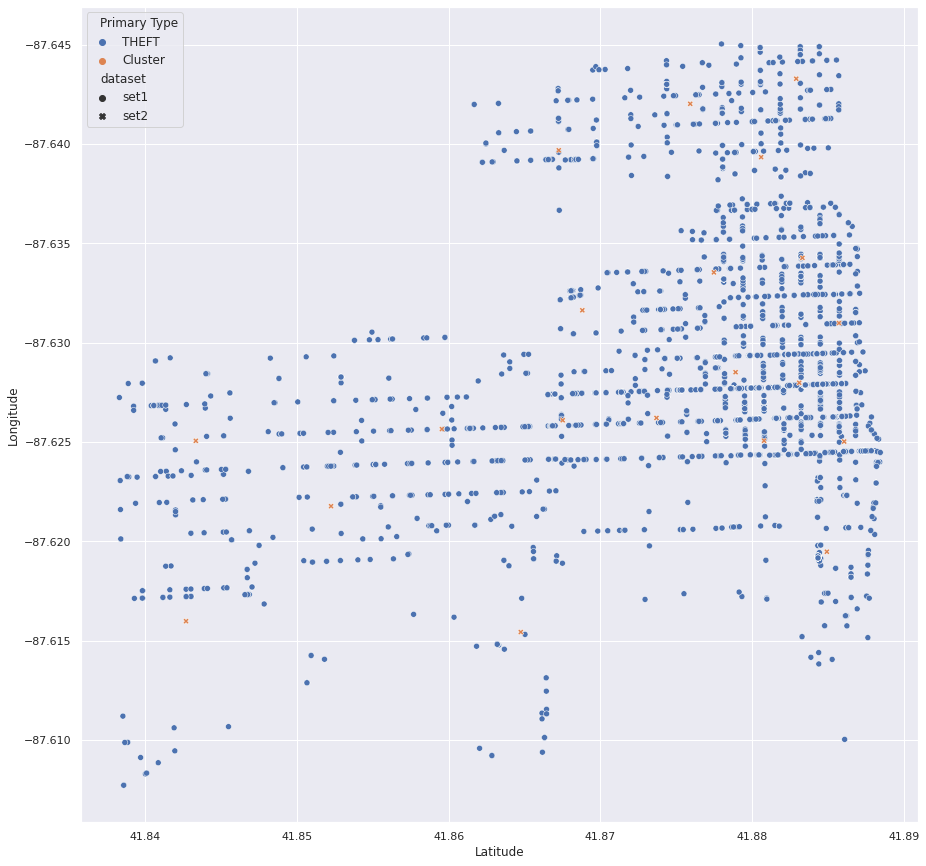

In [52]:
subconjunto=districts.get_group(1)
separado=subconjunto.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
con_clusters = pd.concat([subconjunto.assign(dataset='set1'), df.assign(dataset='set2')])
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

In [54]:
years = theft.groupby("Year")

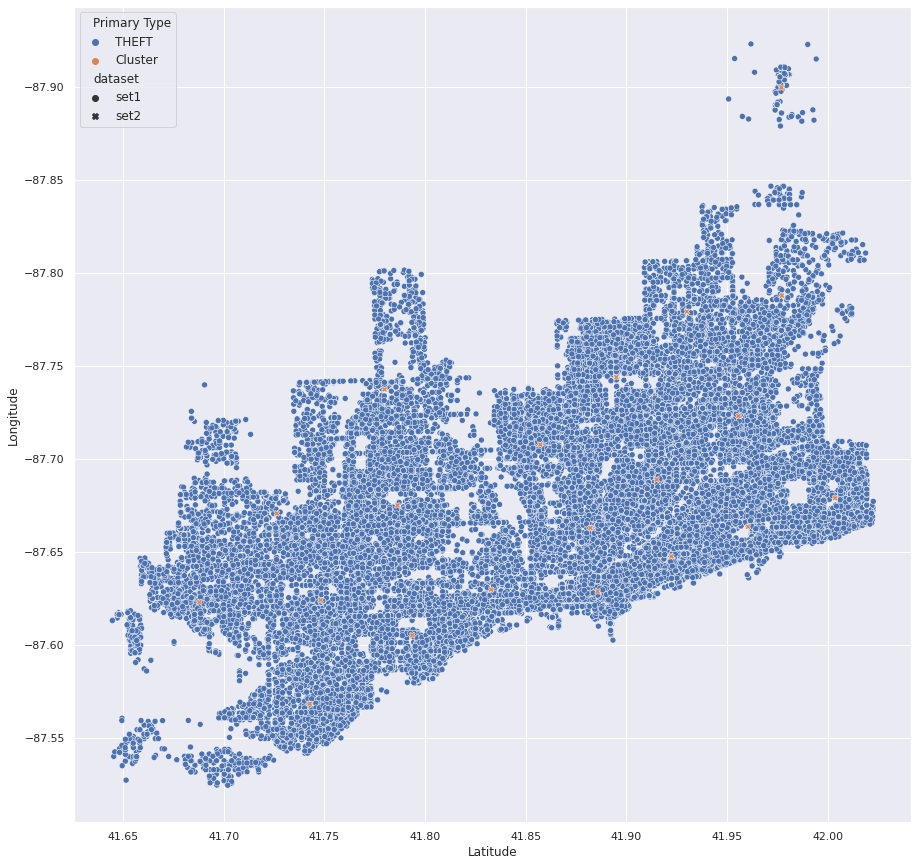

In [57]:
subconjunto=years.get_group(2017)
separado=subconjunto.loc[: , ['Latitude', 'Longitude']]
separado.dropna(inplace = True)
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
con_clusters = pd.concat([subconjunto.assign(dataset='set1'), df.assign(dataset='set2')])
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

Podemos graficar los crimenes para todo chicago usando filtrado de año, para despues graficar por tipos

In [63]:
all_year = crimesDf.groupby("Year")
subconjunto=all_year.get_group(2017)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


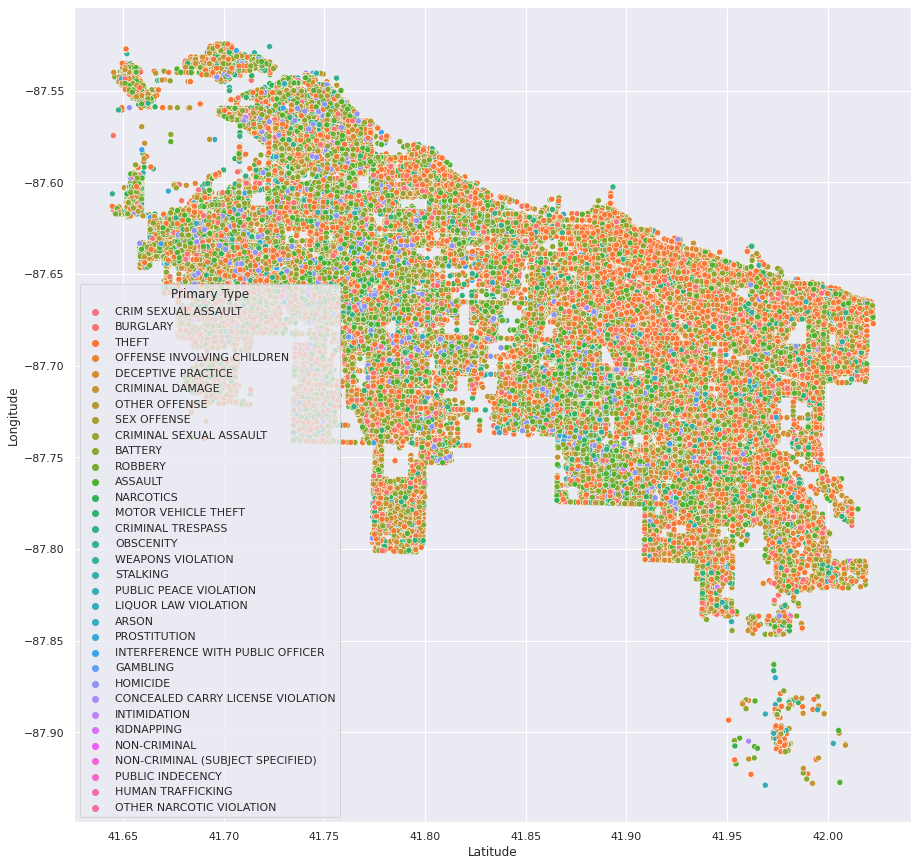

In [65]:
sns.scatterplot(x='Latitude', y='Longitude', data=subconjunto,hue="Primary Type")
plt.show()

Podmeos reducir el area a un solo distrito, donde podemos ver que empizan a aparecer las calleds del distrito

In [73]:
all_year_district = subconjunto.groupby("District")
subconjunto=all_year_district.get_group(1)

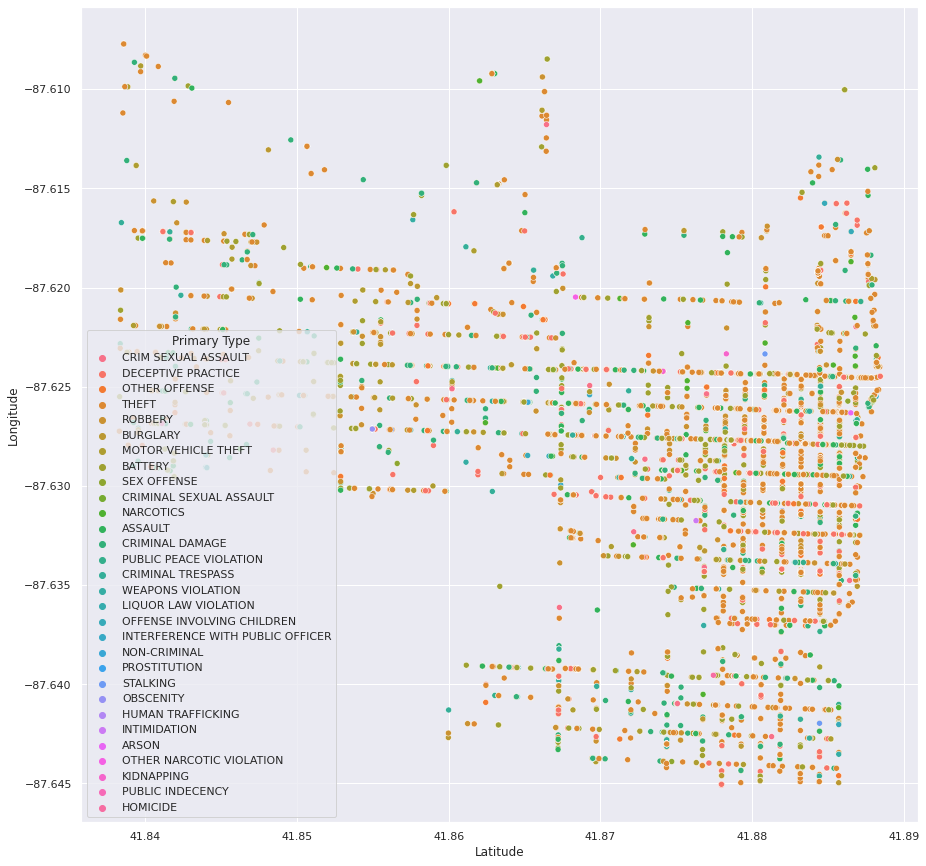

In [74]:
sns.scatterplot(x='Latitude', y='Longitude', data=subconjunto,hue="Primary Type")
plt.show()